<a href="https://colab.research.google.com/github/skflwright/Reading-Group-Practical-MLOps/blob/master/KW_GenAI_workshop_img2music_PoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[phonographioGPT](https://docs.google.com/document/d/1HIWw3V233eM-GXDhOd9F84zs96hiUAM0Sbo_XQmBAxA/edit#)

## Step LessThanZero: EDA

In [1]:
#EDA Requirements
import pandas as pd 
import numpy as np
import string
import nltk
import nltk.corpus
import sklearn
import csv
import re
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#load the data 
songs = pd.read_csv('/HundrethofaMillionSongs.csv')

##Data Dictionary 
The following are the features that the full database includes. This pilot sample only includes: 
SongNumber:
SongID: 
AlbumID: 
AlbumName: 
ArtistID: 
ArtistName: 
Duration: 
KeySignature: 
KeySignatureConfidence: 
Tempo:
TimeSignature: 
TimeSignatureConfidence: 
Title: 
Year:

Other features for potential future use include: (source: http://millionsongdataset.com/pages/getting-dataset/#subset) 

artist_mbid: db92a151-1ac2-438b-bc43-b82e149ddd50 = the musicbrainz.org ID for this artists is db9...
artist_mbtags: shape = (4,) this artist received 4 tags on musicbrainz.org
artist_mbtags_count: shape = (4,)
raw tag count of the 4 tags this artist received on musicbrainz.org
artist_name: 
artist name
artist_playmeid: 1338
the ID of that artist on the service playme.com
artist_terms: shape = (12,)
this artist has 12 terms (tags) from The Echo Nest
artist_terms_freq: shape = (12,)
frequency of the 12 terms from The Echo Nest (number between 0 and 1)
artist_terms_weight: shape = (12,)
weight of the 12 terms from The Echo Nest (number between 0 and 1)
audio_md5: bf53f8113508a466cd2d3fda18b06368
hash code of the audio used for the analysis by The Echo Nest
bars_confidence: shape = (99,)
confidence value (between 0 and 1) associated with each bar by The Echo Nest
bars_start: shape = (99,)
start time of each bar according to The Echo Nest, this song has 99 bars
beats_confidence: shape = (397,)
confidence value (between 0 and 1) associated with each beat by The Echo Nest
beats_start: shape = (397,)
start time of each beat according to The Echo Nest, this song has 397 beats
danceability: 0.0
danceability measure of this song according to The Echo Nest (between 0 and 1, 0 => not analyzed)
duration: 211.69587
duration of the track in seconds
end_of_fade_in: 0.139
time of the end of the fade in, at the beginning of the song, according to The Echo Nest
energy: 0.0
energy measure (not in the signal processing sense) according to The Echo Nest (between 0 and 1, 0 => not analyzed)
key: 1
estimation of the key the song is in by The Echo Nest
key_confidence: 0.324
confidence of the key estimation
loudness: -7.75
general loudness of the track
mode: 1
estimation of the mode the song is in by The Echo Nest
mode_confidence: 0.434
confidence of the mode estimation
release: Big Tunes - Back 2 The 80s
album name from which the track was taken, some songs / tracks can come from many albums, we give only one
release_7digitalid: 786795
the ID of the release (album) on the service 7digital.com
sections_confidence: shape = (10,)
confidence value (between 0 and 1) associated with each section by The Echo Nest
sections_start: shape = (10,)
start time of each section according to The Echo Nest, this song has 10 sections
segments_confidence: shape = (935,)
confidence value (between 0 and 1) associated with each segment by The Echo Nest
segments_loudness_max: shape = (935,)
max loudness during each segment
segments_loudness_max_time: shape = (935,)
time of the max loudness during each segment
segments_loudness_start: shape = (935,)
loudness at the beginning of each segment
segments_pitches: shape = (935, 12)
chroma features for each segment (normalized so max is 1.)
segments_start: shape = (935,)
start time of each segment (~ musical event, or onset) according to The Echo Nest, this song has 935 segments
segments_timbre: shape = (935, 12)
MFCC-like features for each segment
similar_artists: shape = (100,)
a list of 100 artists (their Echo Nest ID) similar to Rick Astley according to The Echo Nest
song_hotttnesss: 0.864248830588
according to The Echo Nest, when downloaded (in December 2010), this song had a 'hotttnesss' of 0.8 (on a scale of 0 and 1)
song_id: SOCWJDB12A58A776AF
The Echo Nest song ID, note that a song can be associated with many tracks (with very slight audio differences)
start_of_fade_out: 198.536
start time of the fade out, in seconds, at the end of the song, according to The Echo Nest
tatums_confidence: shape = (794,)
confidence value (between 0 and 1) associated with each tatum by The Echo Nest
tatums_start: shape = (794,)
start time of each tatum according to The Echo Nest, this song has 794 tatums
tempo: 113.359
tempo in BPM according to The Echo Nest
time_signature: 4
time signature of the song according to The Echo Nest, i.e. usual number of beats per bar
time_signature_confidence: 0.634
confidence of the time signature estimation
title: Never Gonna Give You Up
song title
track_7digitalid: 8707738
the ID of this song on the service 7digital.com
track_id: TRAXLZU12903D05F94


In [11]:
songs.head()  #noticing that we have year == 0. Might want to get rid of those as they might be harder to find data for..


,SongNumer,SongID,AlbumID,AlbumName,ArtistID,ArtistLocation,ArtistName,Duration,KeySignature,KeySignatureConfidence,Tempo,TimeSignature,TimeSignatureConfidence,Title,Year
0,2,SOMZWCG12A8C13C480,300848,Fear Itself',ARD7TVE118799F1,California - LA,Casual,218.93179,1,0.736,92.198,4,0.778,I Didnt Mean To,0
1,4,SOXVLOJ12A0189215,514953,Las Numero 1 De La Sonora Santanera',ARKRRTF11879984DA,NaN,Sonora Santanera,177.47546,8,0.643,100.070,1,0.000,Amor De Caaret,0
2,7,SOYMRWW12A6D4FA14,41838,Ordinary Day',ARKFYS9118798E58F,NaN,Jeff And Sheri Easter,267.70240,5,0.635,147.782,3,0.454,The Moon And I (Ordinary Day Alum Version),0
3,8,SOMJYD12A6D4F8557,25824,Da Ghetto Psychic',ARD0S29118797F5,Ohio,Rated R,114.78159,1,0.000,111.787,1,0.000,Keepin It Real (Skit),0
4,9,SOHKNRJ12A6701D1F8,8876,Gin & Phonic',AR10USD118799F3F1,urlington Ontario Canada,Tweeterfriendly Music,189.57016,4,0.000,101.430,3,0.408,Drop of Rain,0


<Axes: >

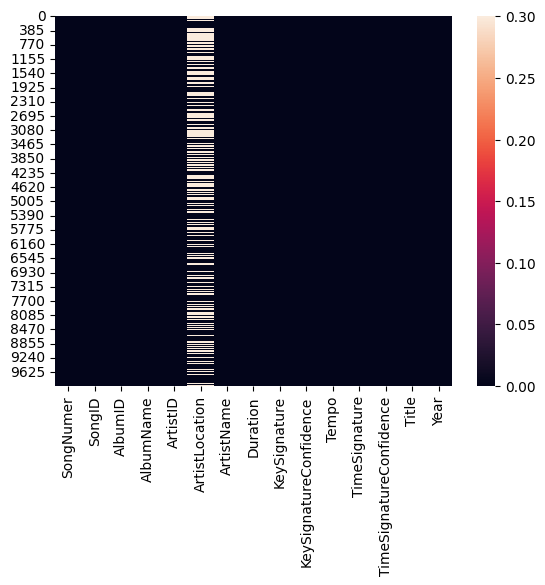

In [12]:
sns.heatmap(songs.isnull(),cbar=True,vmin=0,vmax=.3) 

In [13]:
drop_columns=['ArtistLocation']
songs.drop(drop_columns, inplace=True, axis=1)


In [14]:
songs.columns

Index(['SongNumer', 'SongID', 'AlbumID', 'AlbumName', 'ArtistID', 'ArtistName',
       'Duration', 'KeySignature', 'KeySignatureConfidence', 'Tempo',
       'TimeSignature', 'TimeSignatureConfidence', 'Title', 'Year'],
      dtype='object')

In [15]:
songs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SongNumer                10001 non-null  int64  
 1   SongID                   10001 non-null  object 
 2   AlbumID                  10001 non-null  int64  
 3   AlbumName                10001 non-null  object 
 4   ArtistID                 10001 non-null  object 
 5   ArtistName               10001 non-null  object 
 6   Duration                 10001 non-null  float64
 7   KeySignature             10001 non-null  int64  
 8   KeySignatureConfidence   10001 non-null  float64
 9   Tempo                    10001 non-null  float64
 10  TimeSignature            10001 non-null  int64  
 11  TimeSignatureConfidence  10001 non-null  float64
 12  Title                    10000 non-null  object 
 13  Year                     10001 non-null  int64  
dtypes: float64(4), int64(5

In [16]:
songs.describe()

,SongNumer,AlbumID,Duration,KeySignature,KeySignatureConfidence,Tempo,TimeSignature,TimeSignatureConfidence,Year
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,5001.000000,371018.762424,238.511689,5.276072,0.449584,122.920477,3.564944,0.509898,934.811219
std,2887.184355,236757.658582,114.132569,3.553910,0.274962,35.186246,1.266257,0.373411,996.657859
min,1.000000,63.000000,1.044440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2501.000000,172858.000000,176.038730,2.000000,0.225000,96.967000,3.000000,0.098000,0.000000
50%,5001.000000,333103.000000,223.059140,5.000000,0.469000,120.162000,4.000000,0.551000,0.000000
75%,7501.000000,573497.000000,276.375060,8.000000,0.659000,144.017000,4.000000,0.864000,2000.000000
max,10001.000000,823599.000000,1819.767710,11.000000,1.000000,262.828000,7.000000,1.000000,2010.000000


In [43]:
unique_artists = songs['ArtistName'].nunique()
print(unique_artists)


4412


## Step 0: Requirements

In [ ]:
!pip install spotipy
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Step 1: Collect Data (images and MIDI files)

Spotify cover art:
- Install SpotiPY
- Head to https://developer.spotify.com/dashboard/ and log in to Spotify.
   - Select “Create an App”
   - Get your “Client ID” and “Client Secret” from:
     Dashboard > MyApp > Settings > Basic Information
  
     These will be required for accessing the API. Do not share!
- In the cell below, you get authorization. This has worked so far. If something goes wrong try to figure it out [here](https://developer.spotify.com/documentation/web-api/tutorials/code-flow)

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '6c0649ae22a24912b9c17d42459edc29'
client_secret = 'a29dc6dcc6b141b29ddb5b25eb2d09c7'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Search from the album you want using its title name. Retrieve the URL.

In [ ]:
album_name = 'Witch-Hunt in Lotusland'
results = sp.search(q=album_name, type='album')

album_uri = results['albums']['items'][0]['uri']
album = sp.album(album_uri)

image_url = album['images'][0]['url']

Display the image using the 'Pillow' library

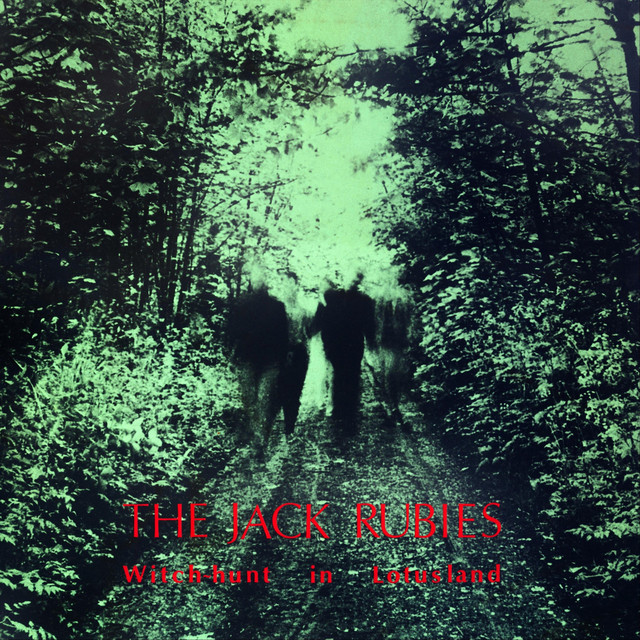

In [ ]:
import requests
from PIL import Image

response = requests.get(image_url, stream=True)
image = Image.open(response.raw)

image.show()

## Step 2a: [Image-to-Encodings](https://huggingface.co/docs/transformers/main/en/model_doc/vit#transformers.ViTModel)

    Vision Transformer


In [ ]:
from transformers import AutoImageProcessor, ViTModel
import torch

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    # The outputs are the image encodings
    outputs = model(**inputs)

# last_hidden_states = outputs.last_hidden_state
# list(last_hidden_states.shape)

## Step 2b: [Image-to-Text](https://huggingface.co/nlpconnect/vit-gpt2-image-captioning)

    Vision Transformer + GPT2
      or 
    [BLIP-2](https://huggingface.co/docs/transformers/main/en/model_doc/blip-2#transformers.Blip2QFormerModel) + Prompt (eg "Describe the image")

    Used to generate text from Spotify cover album’s

    Not sure if we keep the encodings from Step_2a or we use text from this step


or use [Vision-CAIR/MiniGPT-4](https://minigpt-4.github.io/)